# Visualization

Data visualization is a key part of data analysis.
Before we've seen how to present data in tabular form, now we will see how to visualize it.

In [ ]:
import seaborn as sns

In [ ]:
# Load some data
df = sns.load_dataset('iris')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

# Visualization with Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

Matplotlib is an excellent graphics library for generating scientific figures, with a slightly steeper learning curve than other libraries and a somewhat aging API, yet it is still the most widely used library for plotting in the Python community. It allows for any kind of visualization, from quick and simple to complex and custom.
Many other libraries are built on top of Matplotlib and are designed to work in conjunction with analysis tools from the SciPy stack, such as NumPy and Pandas.

In [ ]:
import matplotlib.pyplot as plt  # slightly unusual, but always used like this

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style.

Note that journals, fields and experiments may have their own preferred styles. Three notable libraries provide pre-defined styles:
- [seaborn](https://seaborn.pydata.org/): a high-level interface for Matplotlib that provides a powerful, concise and beautiful style.
- [SciencePlots](https://github.com/garrettj403/SciencePlots): a Matplotlib style package with a focus on scientific plots for different journals.
- [mplhep](https://github.com/scikit-hep/mplhep): a Matplotlib style package with a focus on high energy physics (HEP) styles and histogram plots.

In [ ]:
plt.style.use('classic')

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [ ]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()  # always create a figure
plt.plot(x, np.sin(x), '-')  # plot x, y data with a solid line
plt.plot(x, np.cos(x), '--')
# plt.savefig('my_figure.png')  # save as PNG file if wanted
plt.show()  # only needed in scripts and only if desired

In [ ]:
fig.canvas.get_supported_filetypes()  # these are the supported file types to save the figure

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

In [ ]:
plt.gca()

In [ ]:
plt.gcf()

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

### Visualizing iris



In [ ]:
fig = plt.figure()
plt.plot(df['sepal_length'], df['sepal_width'], 'o')

### A complete plot

A plot needs more elements than just the data points. We need labels, a title, and maybe a legend.

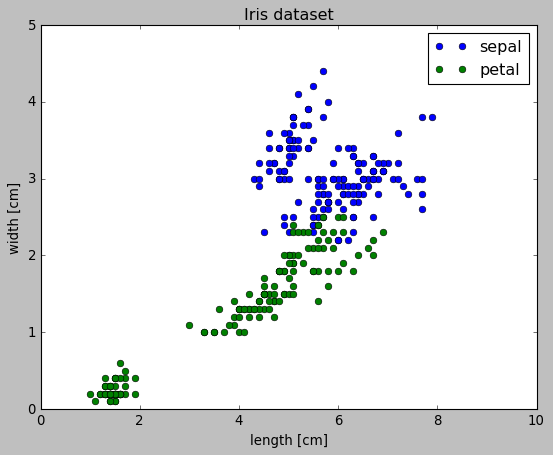

In [51]:
plt.figure()
plt.plot(df['sepal_length'], df['sepal_width'], 'o', label='sepal')
plt.plot(df['petal_length'], df['petal_width'], 'o', label='petal')
plt.xlabel('length [cm]')
plt.ylabel('width [cm]')
plt.title('Iris dataset')
plt.xlim(0, 10)  # set the limits of the x-axis, not needed in general automatically set
plt.ylim(0, 5)
plt.legend()

## Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

### Plotting with Pandas

Pandas has a built-in implementation of Matplotlib that allows you to call the plot methods directly on the DataFrame objects.

In [ ]:
df.plot('sepal_length', 'sepal_width', 'scatter', marker='o')

In [ ]:
# df.query(...).plot('sepal_length', 'sepal_width', 'scatter', marker='o')  # we can also do a pre-selection

### Many scatter plot styles

The `plot` method has many options to customize the plot. For example, we can change the color of the points, the size, and the transparency.

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

### Scatter plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

In [ ]:
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # show color scale

## Seaborn

Seaborn is a Python visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics and offers a wide variety of out-of-the-box plots, see also the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html).

It is aware of Pandas objects and can be used to quickly visualize dataframes.

In [ ]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="petal_length",
    y="petal_width",
    hue="species",
    kind="kde",
)

## Histogram plots

Histograms are a great way to simply visualize the distribution of a single variable. They are more generally a data reduction technique, as they reduce the data to a few key statistics.



In [ ]:
bins, edges = np.histogram(df['sepal_length'], bins=20)
print(f"bins = {bins}, edges = {edges}")

Great! But how do we visualize this? We can use the ``mplhep`` library with ``mplhep.histplot((bins, edges))``, an extension that allows to plot pre-made histograms.
Matplotlib itself only has a function that bins the data first, and then plots it.

For visualizing the distribution of a single variable, the ``plt.hist()`` or the built-in Pandas method ``df.hist()`` can be used.

plt.figure()
fig, bins, edges = plt.hist(df['sepal_length'], bins=20, alpha=0.5, label='sepal length')
plt.xlabel('length [cm]')
plt.ylabel('count')
plt.legend()

In [ ]:
df.hist()

In [ ]:
df.hist(column='sepal_length', by='species')

### Bins and ranges

To overlay histograms, we want to make sure that they are created in the same range and with the same number of bins. ``plt.hist()`` allows to set the range and the number of bins and returns the bin edges and the counts.

In [ ]:
plt.figure()  # reusing the edges
bins_setosa, edges, fig = plt.hist(df.query("species == 'setosa'")['sepal_length'], bins=20, alpha=0.5, label='setosa')
# convention: _ is a throwaway variable
bins_versicolor, *_ = plt.hist(df.query("species == 'versicolor'")['sepal_length'], bins=edges, alpha=0.5, label='versicolor')
plt.xlabel('length [cm]')
plt.ylabel('count')
plt.legend()

In [ ]:
plt.figure()  # explicit range
nbins = 20
plotrange = (4, 6)
alpha = 0.5
plt.hist(df.query("species == 'setosa'")['sepal_length'], bins=nbins, range=plotrange, alpha=alpha, label='setosa')
plt.hist(df.query("species == 'versicolor'")['sepal_length'], bins=nbins, range=plotrange, alpha=alpha, label='versicolor')
plt.xlabel('length [cm]')
plt.ylabel('count')
plt.legend()

### 2D histograms

For two-dimensional histograms, we can use the ``plt.hist2d()`` function.

In [ ]:
plt.figure
plt.hist2d(df['sepal_length'], df['sepal_width'], bins=20, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

In [ ]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Errorbars

Errorbars are a way to visualize the uncertainty of a measurement. They can be added to a plot using the ``plt.errorbar()`` function.
We can plot the errorbars for the sepal length on the histogram we created before.

In [ ]:
plt.figure()
midpoints = (edges[:-1] + edges[1:]) / 2
plt.errorbar(midpoints, bins_setosa, yerr=np.sqrt(bins), fmt='o', label='setosa')
plt.errorbar(midpoints, bins_versicolor, yerr=np.sqrt(bins_setosa), fmt='o', label='versicolor')
plt.xlabel('length [cm]')
plt.ylabel('count')
plt.legend()